# Futures Trend Following Portfolio

    1. The Security closes with 50/100 ma > 0, buy.
    2. If the Security closes 50/100 ma < 0, sell your long position.
    
    (For a Portfolio of securities.)

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### MICRO FUTURES

In [3]:
# symbol: (description, multiplier)


micro_futures = {
    'MES=F': 'Micro E-mini S&P 500 Index Futures',
    'MNQ=F': 'Micro E-mini Nasdaq-100 Index Futures',
    'M2K=F': 'Micro E-mini Russell 2000 Index Futures',
    'MYM=F': 'Micro E-mini Dow Jones Futures',
    'MGC=F': 'Micro Gold Futures',
    'SIL=F': 'Micro Silver Futures',
    'M6A=F': 'Micro AUD/USD Futures',
    'MSF=F': 'Micro CHF/USD Futures',
    'MCD=F': 'Micro CAD/USD Futures',
    'MSF=F': 'Micro CHF/USD Futures',
    'M6E=F': 'Micro EUR/USD Futures',
    'M6B=F': 'Micro GBP/USD Futures',
    'MIR=F': 'Micro INR/USD Futures'
}

symbols = list(micro_futures)
#symbols = ['MES=F']
capital = 100_000
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'sell_short' : False,
    'stock_market_calendar' : True,
    'margin' : 2,
    'sma_timeperiod_slow': 50,
    'sma_timeperiod_fast': 10,
    'use_vola_weight' : True
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed





View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2019-07-17,0,1423.30,5,entry,LONG,MGC=F
1,2019-07-17,1,15.89,421,entry,LONG,SIL=F
2,2019-07-17,2,1551.60,6,entry,LONG,M2K=F
3,2019-07-17,3,1.13,19423,entry,LONG,M6E=F
4,2019-07-17,4,145.22,234,entry,LONG,MIR=F


In [7]:
s.tlog.head()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
0,2019-07-17,1.13,2019-07-24,1.12,-0.01,-180.63,19423,-180.63,LONG,M6E=F
1,2019-07-17,0.70,2019-08-01,0.68,-0.02,-608.11,28550,-788.75,LONG,M6A=F
2,2019-07-17,145.22,2019-08-05,139.89,-5.33,-1247.22,234,-2035.97,LONG,MIR=F
3,2019-07-17,0.77,2019-08-08,0.76,-0.01,-358.80,30667,-2394.77,LONG,MCD=F
4,2019-07-17,1551.60,2019-08-09,1513.70,-37.90,-227.40,6,-2622.17,LONG,M2K=F


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-06-28,111214.13,111214.13,111214.13,6,91424.03,1.00,-
2021-06-29,111183.83,111183.83,111183.83,6,91424.03,1.00,-
2021-06-30,111212.93,111212.93,111212.93,6,91424.03,1.00,-
2021-07-01,111337.28,111337.28,111337.28,6,91424.03,1.00,-
2021-07-02,111358.28,111358.28,111358.28,0,111358.28,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                   2019-07-17
end                                                     2021-07-02
beginning_balance                                           100000
ending_balance                                           111358.28
total_net_profit                                          11358.28
gross_profit                                              25300.03
gross_loss                                               -13941.75
profit_factor                                                 1.81
return_on_initial_capital                                    11.36
annual_return_rate                                            5.64
trading_period                           1 years 11 months 15 days
pct_time_in_market                                           98.78
margin                                                           2
avg_leverage                                                  1.31
max_leverage                                                  

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
M6B=F,"$1,793.94",0.08,0.16,1.90
MGC=F,"$1,419.80",0.08,0.13,1.50
SIL=F,"$3,137.79",0.08,0.28,3.32
M2K=F,"$1,588.50",0.08,0.14,1.68
M6E=F,-$463.42,0.08,-0.04,-0.49
MIR=F,"-$2,416.13",0.08,-0.21,-2.55
MNQ=F,$406.25,0.08,0.04,0.43
M6A=F,"$1,247.89",0.08,0.11,1.32
MES=F,"$1,919.50",0.08,0.17,2.03
MCD=F,"$2,211.41",0.08,0.19,2.34


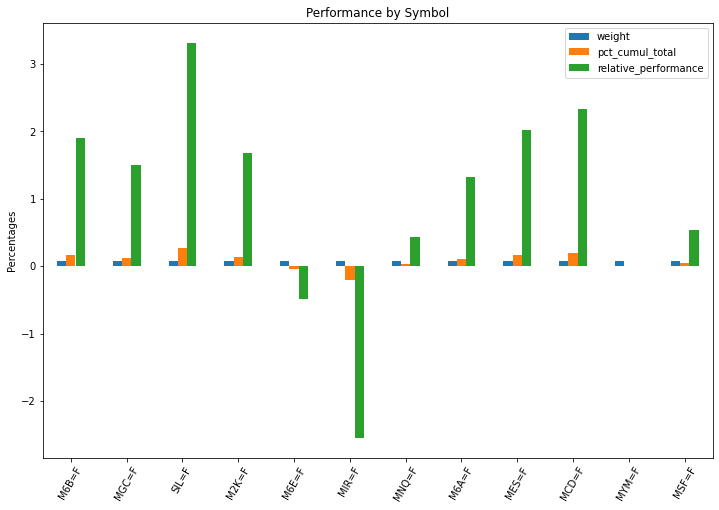

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,M6B=F,MGC=F,SIL=F,M2K=F,M6E=F,MIR=F,MNQ=F,M6A=F,MES=F,MCD=F,MYM=F,MSF=F
M6B=F,1.00,0.22,0.26,0.25,0.55,0.30,0.19,0.66,0.22,0.55,0.22,0.46
MGC=F,0.22,1.00,0.79,0.12,0.32,0.11,0.12,0.30,0.08,0.17,0.07,0.36
SIL=F,0.26,0.79,1.00,0.23,0.31,0.12,0.18,0.38,0.17,0.30,0.17,0.31
M2K=F,0.25,0.12,0.23,1.00,0.06,0.38,0.77,0.41,0.89,0.41,0.90,-0.09
M6E=F,0.55,0.32,0.31,0.06,1.00,0.22,0.02,0.60,0.02,0.45,0.02,0.83
MIR=F,0.30,0.11,0.12,0.38,0.22,1.00,0.34,0.43,0.37,0.45,0.36,0.07
MNQ=F,0.19,0.12,0.18,0.77,0.02,0.34,1.00,0.30,0.92,0.29,0.83,-0.07
M6A=F,0.66,0.30,0.38,0.41,0.60,0.43,0.30,1.00,0.35,0.72,0.36,0.44
MES=F,0.22,0.08,0.17,0.89,0.02,0.37,0.92,0.35,1.00,0.36,0.97,-0.09
MCD=F,0.55,0.17,0.30,0.41,0.45,0.45,0.29,0.72,0.36,1.00,0.38,0.30


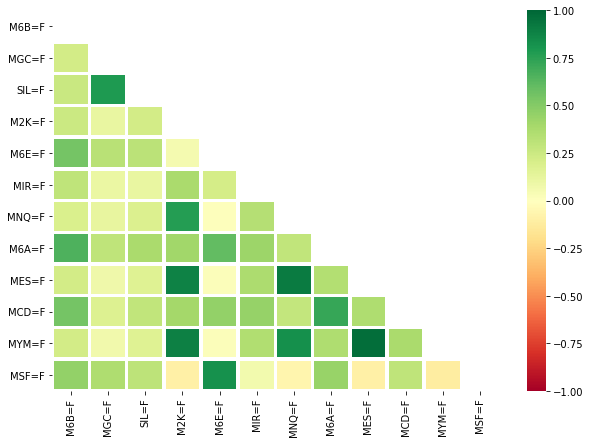

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

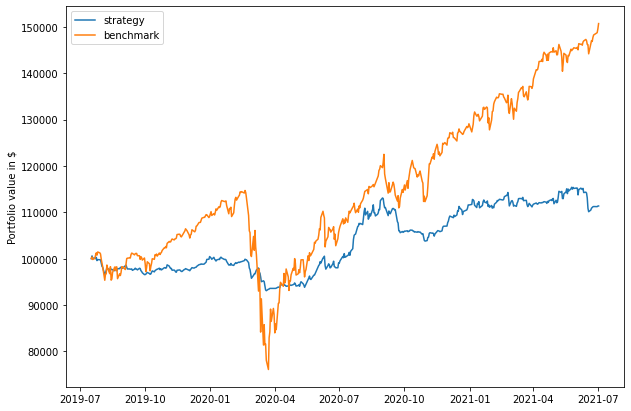

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,5.64,23.27
max_closed_out_drawdown,-8.23,-33.66
annualized_return_over_max_drawdown,0.69,0.69
best_month,10.55,23.02
worst_month,-6.67,-30.93
sharpe_ratio,0.71,0.95
sortino_ratio,0.87,1.04
monthly_std,2.77,6.35
annual_std,4.27,15.76


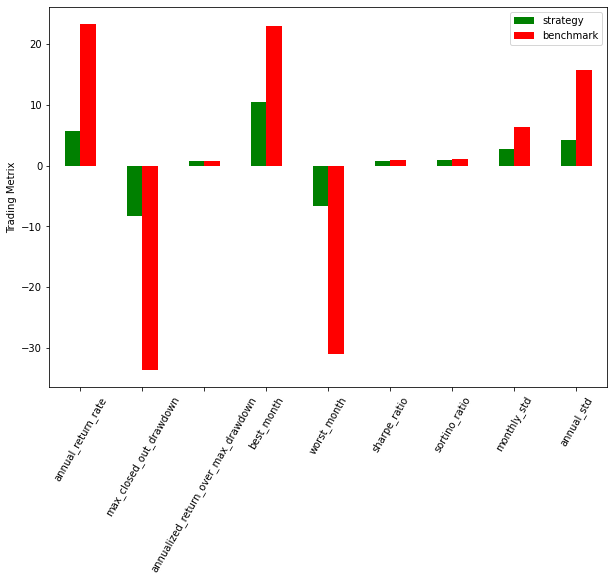

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterian(s.stats, benchmark.stats)
kelly

sharpe_ratio            0.71
sharpe_ratio_max        0.87
sharpe_ratio_min        0.56
strategy risk           0.04
instrument risk         0.16
optimal target risk     0.71
half kelly criterian    0.36
aggressive leverage     4.53
moderate leverage       2.27
conservative leverage   1.78
dtype: float64